In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data= pd.read_csv("D:/internship_projects/advertising.csv")

In [5]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
data.shape

(200, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# checking missing value

In [15]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
# no null value 
# we don't have to habdle missing value 

# Data visualization

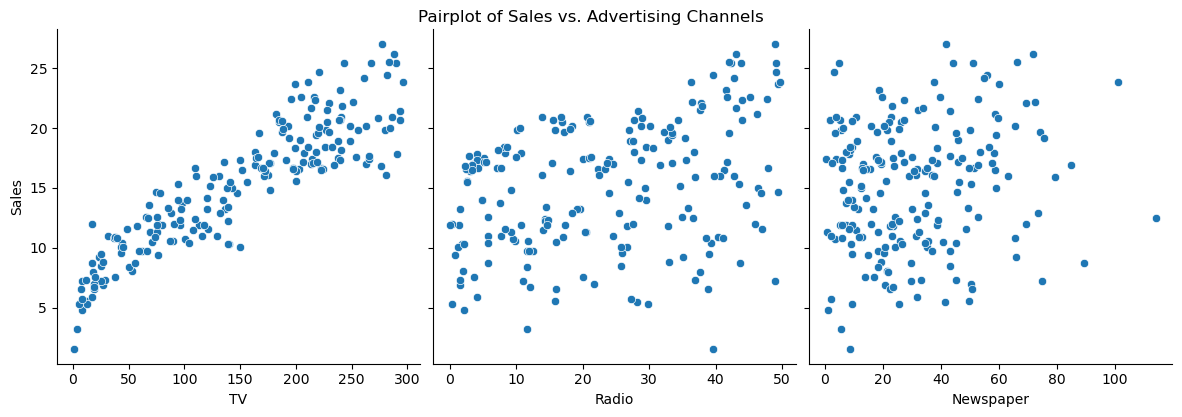

In [20]:
#Pairplot to visualize relationships between variables
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.suptitle("Pairplot of Sales vs. Advertising Channels", y=1.02)
plt.show() 

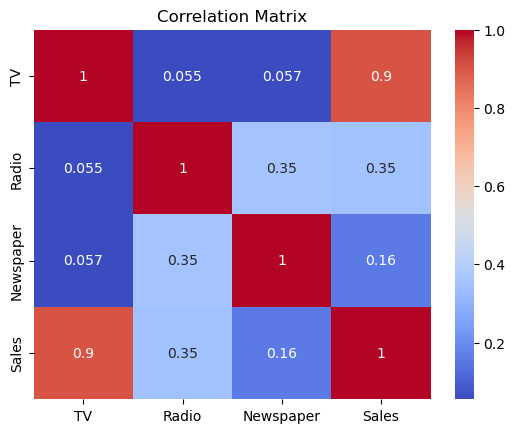

In [22]:
# Heatmap to visualize correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Selection

In [25]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [27]:
print( X, y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


# Model Training

In [30]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Model Evaluation:
Mean Squared Error: 2.9077569102710905
R-squared: 0.9059011844150826


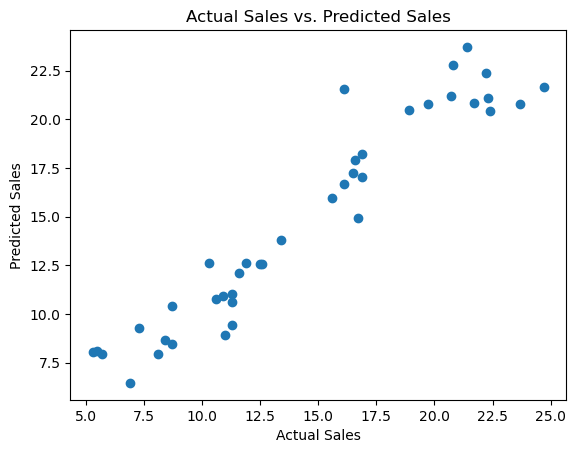

In [39]:
# Visualization of Predicted vs. Actual Sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.show()

# Using the Model for Predictions

In [42]:
new_data = pd.DataFrame({
    'TV': [100],
    'Radio': [25],
    'Newspaper': [10]
})

predicted_sales = model.predict(new_data)
print("\nPredicted Sales:", predicted_sales[0])


Predicted Sales: 12.732054013980342
